# Title 2
## Subtitle

In [46]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import scipy.stats as sp
%matplotlib inline

In [2]:
apple_store = pd.read_csv("AppleStore.csv")
google_store = pd.read_csv("googleplaystore.csv")

# Markdown to describe the data

In [3]:
print("**Apple Store Dataset Columns:", '\n')
for c in apple_store.columns:
    print(c)

**Apple Store Dataset Columns: 

id
track_name
size_bytes
currency
price
rating_count_tot
rating_count_ver
user_rating
user_rating_ver
ver
cont_rating
prime_genre
sup_devices.num
ipadSc_urls.num
lang.num
vpp_lic


In [4]:
print("**Google Play Store Dataset Columns:", '\n')
for c in google_store.columns:
    print(c)

**Google Play Store Dataset Columns: 

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


# CLEANING PROCESS STAGE 1

The analysis is going to focus on free apps, and not all columns are needed for the final analysis. So based on the column analysis these are the key <span style="color:green">**properties to keep**</span> in order to have a consistent merged file:
- App Name/IDs
- App Size (bytes)
- Installs
- Count of total Ratings
- Ratings (total)
- Category/Genre/Prime Genre
- Price

The following related properties will be <span style="color:red">**dropped**</span>:
- **Related to Versions**
- **Related to Devices/Softwares**

The analysis final outcome is related to categories and different ways of couting users, and not really related to technical information about the apps itself. For this reason, all these information will be dropped.

The <span style="color:blue">**cleaning process**</span> is going to follow the order:
- Renaming columns
- Dropping/Reordering columns
- Implementing proper data-types to the columns
- Inspecting NaN values and any other wrong inputs
- Dropping paid apps
- Dealing with duplicates

_All done separatedly for Apple and then Google's datasets._

## APPLE

In [5]:
apple_crop = apple_store.copy()[["id", "track_name", "prime_genre", "size_bytes", "price", "rating_count_tot", "user_rating"]]
apple_crop.columns = ["id", "app_name", "genre", "size_bytes", "price", "rating_count", "rating"]
apple_crop.head()

,id,app_name,genre,size_bytes,price,rating_count,rating
0,284882215,Facebook,Social Networking,389879808,0.0,2974676,3.5
1,389801252,Instagram,Photo & Video,113954816,0.0,2161558,4.5
2,529479190,Clash of Clans,Games,116476928,0.0,2130805,4.5
3,420009108,Temple Run,Games,65921024,0.0,1724546,4.5
4,284035177,Pandora - Music & Radio,Music,130242560,0.0,1126879,4.0


In [6]:
apple_crop.shape

(7197, 7)

In [7]:
for c in apple_crop.columns:
    print(c, ':', '\t', apple_crop[c].dtype)

id : 	 int64
app_name : 	 object
genre : 	 object
size_bytes : 	 int64
price : 	 float64
rating_count : 	 int64
rating : 	 float64


In [8]:
for c in apple_crop.columns:
    print(c, '\n', apple_crop[c].isna().value_counts(), '\n')

id 
 False    7197
Name: id, dtype: int64 

app_name 
 False    7197
Name: app_name, dtype: int64 

genre 
 False    7197
Name: genre, dtype: int64 

size_bytes 
 False    7197
Name: size_bytes, dtype: int64 

price 
 False    7197
Name: price, dtype: int64 

rating_count 
 False    7197
Name: rating_count, dtype: int64 

rating 
 False    7197
Name: rating, dtype: int64 



In [9]:
apple_free = apple_crop.copy()[apple_crop['price'] == 0]
print(apple_free.shape)
apple_free.head()

(4056, 7)


,id,app_name,genre,size_bytes,price,rating_count,rating
0,284882215,Facebook,Social Networking,389879808,0.0,2974676,3.5
1,389801252,Instagram,Photo & Video,113954816,0.0,2161558,4.5
2,529479190,Clash of Clans,Games,116476928,0.0,2130805,4.5
3,420009108,Temple Run,Games,65921024,0.0,1724546,4.5
4,284035177,Pandora - Music & Radio,Music,130242560,0.0,1126879,4.0


In [10]:
apple_free.duplicated("app_name", keep=False).value_counts()

False    4052
True        4
dtype: int64

In [11]:
apple_free[apple_free.duplicated("app_name", keep=False)]

,id,app_name,genre,size_bytes,price,rating_count,rating
2948,1173990889,Mannequin Challenge,Games,109705216,0.0,668,3.0
4442,952877179,VR Roller Coaster,Games,169523200,0.0,107,3.5
4463,1178454060,Mannequin Challenge,Games,59572224,0.0,105,4.0
4831,1089824278,VR Roller Coaster,Games,240964608,0.0,67,3.5


In [12]:
apple_free.sort_values("rating_count", ascending=False, inplace=True)
apple_unique = apple_free.drop_duplicates(subset="app_name", keep="first", inplace=False, ignore_index=True)
apple_unique.duplicated("app_name", keep=False).value_counts()

False    4054
dtype: int64

In [13]:
apple_unique[apple_unique['app_name'] == "VR Roller Coaster"]

,id,app_name,genre,size_bytes,price,rating_count,rating
2625,952877179,VR Roller Coaster,Games,169523200,0.0,107,3.5


In [14]:
apple_final = apple_unique.copy()[["app_name", "genre", "size_bytes", "rating_count", "rating"]]
apple_final.head()

,app_name,genre,size_bytes,rating_count,rating
0,Facebook,Social Networking,389879808,2974676,3.5
1,Instagram,Photo & Video,113954816,2161558,4.5
2,Clash of Clans,Games,116476928,2130805,4.5
3,Temple Run,Games,65921024,1724546,4.5
4,Pandora - Music & Radio,Music,130242560,1126879,4.0


# GOOGLE

In [15]:
google_crop = google_store.copy()[["App", "Category", "Genres", "Size", "Price", "Installs", "Reviews", "Rating"]]
google_crop.columns = ["app_name", "category", "genre", "size_bytes", "price", "installs", "rating_count", "rating"]
google_crop.head()

,app_name,category,genre,size_bytes,price,installs,rating_count,rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,19M,0,"10,000+",159,4.1
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,14M,0,"500,000+",967,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,8.7M,0,"5,000,000+",87510,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,25M,0,"50,000,000+",215644,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,2.8M,0,"100,000+",967,4.3


In [16]:
for c in google_crop.columns:
    print(c, ':', '\t', google_crop[c].dtype)

app_name : 	 object
category : 	 object
genre : 	 object
size_bytes : 	 object
price : 	 object
installs : 	 object
rating_count : 	 object
rating : 	 float64


In [17]:
try:
    google_crop['price'] = google_crop['price'].str.replace('$', '', regex=False).astype(float)
except:
    print("There's some price value which is not a price")

There's some price value which is not a price


In [18]:
google_store[google_store['Price'] == "Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
google_crop.loc[~google_crop['price'].str.startswith("$"), 'price'].value_counts()

0           10040
Everyone        1
Name: price, dtype: int64

Decision to drop (low rating count)

In [20]:
google_crop.drop(10472, axis=0, inplace=True)
try:
    google_crop['price'] = google_crop['price'].str.replace('$', '', regex=False).astype(float)
except:
    print("There's some price value which is not a price")

In [21]:
for c in google_crop.columns:
    print(c, ':', '\t', google_crop[c].dtype)

app_name : 	 object
category : 	 object
genre : 	 object
size_bytes : 	 object
price : 	 float64
installs : 	 object
rating_count : 	 object
rating : 	 float64


In [22]:
try:
    google_crop['rating_count'] = google_crop['rating_count'].astype(int)
except:
    print("There's some value which is not rating_count")

In [23]:
google_crop.loc[~google_crop['size_bytes'].str.endswith("M"), 'size_bytes'].value_counts()

Varies with device    1695
375k                     3
266k                     3
201k                     3
118k                     3
                      ... 
414k                     1
308k                     1
921k                     1
246k                     1
749k                     1
Name: size_bytes, Length: 279, dtype: int64

In [24]:
def convert_sizes(siz):
    # Firstly if there's no '.' just substitute M and k for it's respective bytes amount.
    if '.' not in siz:
        return siz.replace('M', '000000').replace('k', '000')
    # Secondly if the number is round but in a float format, we do the same as above.
    elif '.0' in siz:
        return siz.replace('.0M', '000000').replace('.0k', '000')
    # Thirdly if there is a decimal place different than 0, we keep it and add remaining bytes.
    elif '.' in siz:
        return siz.replace('.', '').replace("M", '00000').replace('k', '00')
    # Lastly if there's still some condition not covered, return with no changes.
    else:
        return siz

In [25]:
google_crop['size_bytes'] = google_crop['size_bytes'].apply(convert_sizes)
print(google_crop['size_bytes'].head(10))
print('\n')
print(google_store['Size'].head(10))

0    19000000
1    14000000
2     8700000
3    25000000
4     2800000
5     5600000
6    19000000
7    29000000
8    33000000
9     3100000
Name: size_bytes, dtype: object


0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object


In [26]:
google_crop['size_bytes'] = google_crop['size_bytes'].str.replace('Varies with device', '0').astype(int)
print(google_crop['size_bytes'].describe())
print('\n')
print(google_crop['size_bytes'].value_counts(bins=10))

count    1.084000e+04
mean     1.815209e+07
std      2.217061e+07
min      0.000000e+00
25%      2.600000e+06
50%      9.200000e+06
75%      2.600000e+07
max      1.000000e+08
Name: size_bytes, dtype: float64


(-100000.001, 10000000.0]    5755
(10000000.0, 20000000.0]     1698
(20000000.0, 30000000.0]     1176
(30000000.0, 40000000.0]      656
(40000000.0, 50000000.0]      481
(50000000.0, 60000000.0]      338
(60000000.0, 70000000.0]      240
(90000000.0, 100000000.0]     205
(70000000.0, 80000000.0]      168
(80000000.0, 90000000.0]      123
Name: size_bytes, dtype: int64


In [27]:
for c in google_crop.columns:
    print(c, ':', '\t', google_crop[c].dtype)

app_name : 	 object
category : 	 object
genre : 	 object
size_bytes : 	 int64
price : 	 float64
installs : 	 object
rating_count : 	 int64
rating : 	 float64


In [28]:
google_crop['installs'].head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: installs, dtype: object

In [29]:
google_crop['installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: installs, dtype: int64

In [30]:
google_crop.rename({'installs':'installs_category'}, axis=1, inplace=True)

In [31]:
google_crop.head()

,app_name,category,genre,size_bytes,price,installs_category,rating_count,rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,19000000,0.0,"10,000+",159,4.1
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,14000000,0.0,"500,000+",967,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,8700000,0.0,"5,000,000+",87510,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,25000000,0.0,"50,000,000+",215644,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,2800000,0.0,"100,000+",967,4.3


In [32]:
for c in google_crop.columns:
    print(c, '\n', google_crop[c].isna().value_counts(), '\n')

app_name 
 False    10840
Name: app_name, dtype: int64 

category 
 False    10840
Name: category, dtype: int64 

genre 
 False    10840
Name: genre, dtype: int64 

size_bytes 
 False    10840
Name: size_bytes, dtype: int64 

price 
 False    10840
Name: price, dtype: int64 

installs_category 
 False    10840
Name: installs_category, dtype: int64 

rating_count 
 False    10840
Name: rating_count, dtype: int64 

rating 
 False    9366
True     1474
Name: rating, dtype: int64 



In [33]:
google_free = google_crop.copy()[google_crop['price'] == 0]
print(google_free.shape)
google_free.head()

(10040, 8)


,app_name,category,genre,size_bytes,price,installs_category,rating_count,rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,19000000,0.0,"10,000+",159,4.1
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,14000000,0.0,"500,000+",967,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,8700000,0.0,"5,000,000+",87510,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,25000000,0.0,"50,000,000+",215644,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,2800000,0.0,"100,000+",967,4.3


In [34]:
google_free.sort_values("rating_count", ascending=False, inplace=True)
google_unique = google_free.drop_duplicates(subset="app_name", keep="first", inplace=False, ignore_index=True)
google_unique.duplicated("app_name", keep=False).value_counts()

False    8905
dtype: int64

In [35]:
google_unique['rating'].isna().value_counts()

False    7594
True     1311
Name: rating, dtype: int64

In [36]:
google_unique['category'].value_counts()

FAMILY                 1693
GAME                    863
TOOLS                   751
BUSINESS                408
LIFESTYLE               350
PRODUCTIVITY            346
FINANCE                 328
MEDICAL                 313
SPORTS                  301
PERSONALIZATION         295
COMMUNICATION           288
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             262
NEWS_AND_MAGAZINES      252
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                200
BOOKS_AND_REFERENCE     194
DATING                  165
VIDEO_PLAYERS           160
MAPS_AND_NAVIGATION     126
FOOD_AND_DRINK          110
EDUCATION               103
ENTERTAINMENT            84
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           58
COMICS                   56
BEAUTY                   53
Name: category, dtype: int64

In [44]:
google_nan = google_unique.copy()[google_unique['rating'].isna()]
google_nan.shape

(1311, 8)

In [47]:
google_nan['rating_count'].describe()

count    1311.000000
mean       19.738368
std       148.194805
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max      3248.000000
Name: rating_count, dtype: float64

In [49]:
sp.trim_mean(google_nan['rating_count'], 0.1)

2.9742612011439467

In [57]:
google_nan[google_nan['rating_count'] > 20]

,app_name,category,genre,size_bytes,price,installs_category,rating_count,rating
3924,We learn children's verses in kindergarten,PARENTING,Parenting;Education,6500000,0.0,"100,000+",3248,NaN
4063,Adivina el Emoji,GAME,Trivia,32000000,0.0,"100,000+",2536,NaN
4152,Young Speeches,LIBRARIES_AND_DEMO,Libraries & Demo,2400000,0.0,"500,000+",2221,NaN
4461,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,Comics,22000000,0.0,"50,000+",1330,NaN
4470,Em Fuga Brasil,FAMILY,Simulation,60000000,0.0,"100,000+",1317,NaN
...,...,...,...,...,...,...,...,...
6863,BN Pro Battery Level-White,LIBRARIES_AND_DEMO,Libraries & Demo,200000,0.0,"5,000+",21,NaN
6864,中国語 AQリスニング,FAMILY,Education,17000000,0.0,"5,000+",21,NaN
6867,Find Lover,DATING,Dating,4700000,0.0,"1,000+",21,NaN
6871,Handbreit by a.w.niemeyer,NEWS_AND_MAGAZINES,News & Magazines,36000000,0.0,"1,000+",21,NaN


In [59]:
google_unique[google_unique['rating_count'] <= 1]

,app_name,category,genre,size_bytes,price,installs_category,rating_count,rating
8151,Katalogen.ax,COMMUNICATION,Communication,172000,0.0,100+,1,NaN
8152,CA Technologies,FAMILY,Puzzle,98000000,0.0,100+,1,NaN
8153,AK-47 Assult Rifle: Gun Shooting Simulator Game,GAME,Action,5800000,0.0,500+,1,NaN
8154,DT CLOTHINGS,SHOPPING,Shopping,7900000,0.0,10+,1,5.0
8155,DT Health,MEDICAL,Medical,24000000,0.0,10+,1,NaN
...,...,...,...,...,...,...,...,...
8900,ai.Bot Box,PRODUCTIVITY,Productivity,0,0.0,"10,000+",0,NaN
8901,DN Advanced Service Coder,BUSINESS,Business,21000000,0.0,10+,0,NaN
8902,DN Managed Mobility App,BUSINESS,Business,3400000,0.0,50+,0,NaN
8903,Ultimate DM,FAMILY,Role Playing,0,0.0,10+,0,NaN


In [61]:
google_unique[google_unique['size_bytes'] == 0]

,app_name,category,genre,size_bytes,price,installs_category,rating_count,rating
0,Facebook,SOCIAL,Social,0,0.0,"1,000,000,000+",78158306,4.1
1,WhatsApp Messenger,COMMUNICATION,Communication,0,0.0,"1,000,000,000+",69119316,4.4
2,Instagram,SOCIAL,Social,0,0.0,"1,000,000,000+",66577446,4.5
3,Messenger – Text and Video Chat for Free,COMMUNICATION,Communication,0,0.0,"1,000,000,000+",56646578,4.0
5,Clean Master- Space Cleaner & Antivirus,TOOLS,Tools,0,0.0,"500,000,000+",42916526,4.7
...,...,...,...,...,...,...,...,...
8865,AJ+ Beta,NEWS_AND_MAGAZINES,News & Magazines,0,0.0,"1,000+",0,NaN
8875,BQ Partners,COMMUNICATION,Communication,0,0.0,"1,000+",0,NaN
8876,Shaggy's DM Assistant,PRODUCTIVITY,Productivity,0,0.0,5+,0,NaN
8900,ai.Bot Box,PRODUCTIVITY,Productivity,0,0.0,"10,000+",0,NaN


In [62]:
google_store[google_store['App'] == "Facebook"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [38]:
google_nan['category'].value_counts()

FAMILY                 196
BUSINESS               154
TOOLS                   94
MEDICAL                 85
LIFESTYLE               67
SPORTS                  63
PRODUCTIVITY            63
PERSONALIZATION         62
COMMUNICATION           54
NEWS_AND_MAGAZINES      50
GAME                    41
HEALTH_AND_FITNESS      40
FINANCE                 39
SOCIAL                  35
DATING                  34
BOOKS_AND_REFERENCE     33
TRAVEL_AND_LOCAL        28
SHOPPING                22
LIBRARIES_AND_DEMO      19
EVENTS                  18
FOOD_AND_DRINK          18
VIDEO_PLAYERS           15
PHOTOGRAPHY             14
MAPS_AND_NAVIGATION     13
HOUSE_AND_HOME          12
BEAUTY                  11
PARENTING               10
AUTO_AND_VEHICLES       10
WEATHER                  6
ART_AND_DESIGN           2
COMICS                   2
EDUCATION                1
Name: category, dtype: int64

In [39]:
google_nan['category'].value_counts().sum()

1311

In [40]:
google_nan['category'].value_counts().head(20).sum()

1197

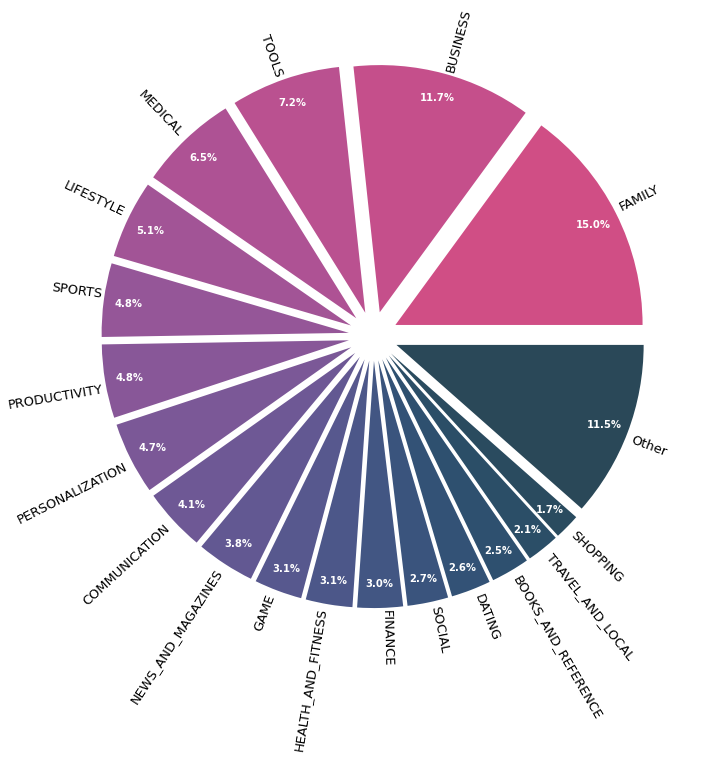

In [42]:
# plt.style.use('ggplot')

gnan_dict = google_nan['category'].value_counts().to_dict()
threshold = 20
gnan_chart = {}

for key, group in itertools.groupby(gnan_dict, lambda k: 'Other' if (gnan_dict[k] < threshold) else k):
    gnan_chart[key] = sum([gnan_dict[k] for k in list(group)])   

labels = gnan_chart.keys()
sizes = gnan_chart.values()
colors = np.array(['#d04e85', '#c54f8b', '#ba5190', '#ae5294', '#a25496', '#955698', '#885798', '#7b5897', '#6e5895', '#625892', '#57588e', '#4c5789', '#425683', '#3a547d', '#335276', '#2e506f', '#2b4e67', '#2a4b5f', '#2a4858'])
fig, ax = plt.subplots(figsize=(10,10))
explosion = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

patches, texts, autotext = ax.pie(sizes, explode=explosion, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.005, startangle=0, rotatelabels=True)
ax.axis('equal')
plt.tight_layout()
for t in range(len(texts)):
    texts[t].set_fontsize(13)
    texts[t].set_fontfamily('sans-serif')
    
for at in range(len(autotext)):
    autotext[at].set_fontsize(10)
    autotext[at].set_fontfamily('sans-serif')
    autotext[at].set_fontweight('bold')
    autotext[at].set_color('white')
plt.show()

# Reference:
# https://datascience.stackexchange.com/a/71417